<p align = "center">
<img src = '../docs/logo.png' height = "250">
</p>

# Trabalho - Conversão Eletromecânica


**Alunos:**
- André Vitor Cadena de Oliveira
- Fábio Augusto Almeida Marçal
- Gabriel Nazário Gonçalves
- Lorenzo Carrera de Oliveira
- Mateus Pincho de Oliveira

---

# Exercício 03

Considere o circuito magnético a seguir e responda os itens: 

<p align = "center">
<img src = '../docs/circuito_ima.png' height = "250">
</p>

---

In [1]:
# Importando módulos...
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.misc import derivative
from scipy.interpolate import CubicSpline # Interpolação spline

# Lidando com os warnings dos plots
import warnings
warnings.filterwarnings('ignore')

## Importando dados da questão
---

In [2]:
W_ima = 2e-2
W_g = 2.5e-2
Espessura_D = 3e-2
d_ima = 1e-2
g = 0.2e-2


Considere que o imã pode ser caracterizado pela curva: 

<p align = "center">
<img src = '../docs/curva_ima.png' height = "300">
</p>

Observe que são fornecidas duas curvas, que apesar de muito semelhantes, a diferença entre essas curvas é utilizada para a realização de projetos de alta precisão em circunstâncias de variação de temperatura e incidência de campo externo. **Para este exercício, considere apenas a curva normal.**

---

## Item 01
Apresente um gráfico para a força magnética que surge no elemento móvel nas condições a seguir

- Uma aproximação linear na forma $B_m = \mu_R(H_m - H_c)$
- Curva $B\times H$ fornecida para o imã

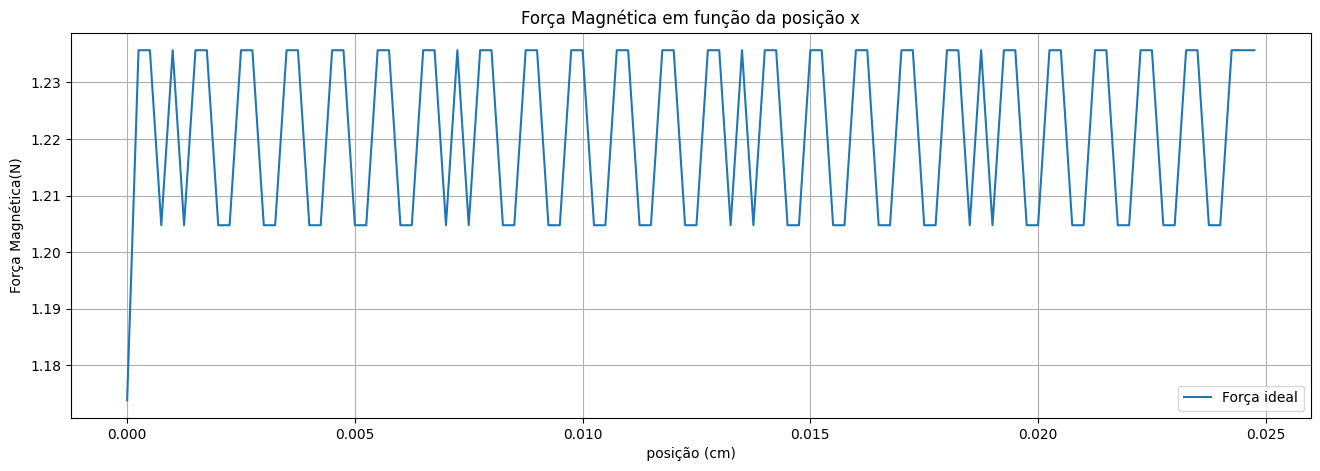

In [7]:
# B e H de acordo com o material; esses dados são expeirmentalmente (definidos pelo fabricante)
H_amostra = 1000*np.array([-51,-50, -49.5,-49, -48, 47.5, 47, 46.5, 45.5, 44, 37, 31, 26, 0])
B_amostra = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5 , 0.6, 0.7, 0.8, 0.9, 1.0, 1.05, 1.1, 1.2])

#Ponto de operação
H_op = -32e3
B_op = 1.07

#Valores de Br (Magnetização Remanescente) e Hc (Coercitividade)
Hc = H_amostra[0]
Br = B_amostra[-1]

ur = Br/(-Hc)

H__B_real = CubicSpline(B_amostra, H_amostra, bc_type='natural')
n_amostras = 1000 # Quantidade de pontos a serem interpolados
B = np.linspace(0, np.max(B_amostra), n_amostras) # Pontos de B igualmente espaçados 

H__B_linear = (B/ur) + Hc

#calculo da força para aproximação linear

F_ideal_x = []

intervalo_x = np.linspace(0, W_g, 101)[:-1] 
for x in intervalo_x:
    Rg = 2*g/(4 * np.pi * 10**(-7)* Espessura_D * (W_g - x))

    Rm = d_ima/(ur * W_ima * Espessura_D)

    F_ideal = (1/2)* ((Hc*d_ima)**2) * (-1) * (2*g/((Rg +Rm)**2)) * (1/((4 * np.pi * 10**(-7)*Espessura_D)*((W_g - x)**2)))
    
    F_ideal_x.append(F_ideal)
    
plt.figure(figsize = (16,5))
plt.plot(intervalo_x, F_ideal_x,'b')
plt.legend(["Força Real"])
plt.title('Força Magnética em função da posição x')
plt.xlabel(' posição (cm) ')
plt.ylabel('Força Magnética(N)')
plt.grid()




--- 

## Item 02

Considerando que é acrescentado uma bobina de 1500 espiras ao sistema: 

- Para um elemento móvel na posição $x = \frac{W_g}{2}$, apresente um gráfico da Densidade de Fluxo $B$ no entreferro em função da corrente aplicada na bobina

--- 
## Item 03

- Considere que é aplicada na bobina uma corrente constante tal que,
para o corpo na posição $x = \frac{W_g}{2}$, o sistema esteja no ponto de
operação normal indicado pelo fabricante do imã. 

Nessas condições,
apresente um gráfico para a força magnética em função da posição $x$